<a href="https://www.kaggle.com/code/dsptlp/line-graph-dual-y-axis?scriptVersionId=162558556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def download_csv(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)

csv_url = 'https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2010000101&latestN=0&startDate=20190101&endDate=20231101&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B1%5D%2C%5B1%5D%2C%5B1%2C2%5D%2C%5B1%5D%5D&checkedLevels='
destination_path = 'data_file.csv'

download_csv(csv_url, destination_path)

In [3]:
df = pd.read_csv(destination_path, encoding='utf-8')
df.head(5)

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2019-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,112178,NaN,NaN,NaN,0
1,2019-02,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,124493,NaN,NaN,NaN,0
2,2019-03,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,187907,NaN,NaN,NaN,0
3,2019-04,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,186487,NaN,NaN,NaN,0
4,2019-05,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,208375,NaN,NaN,NaN,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


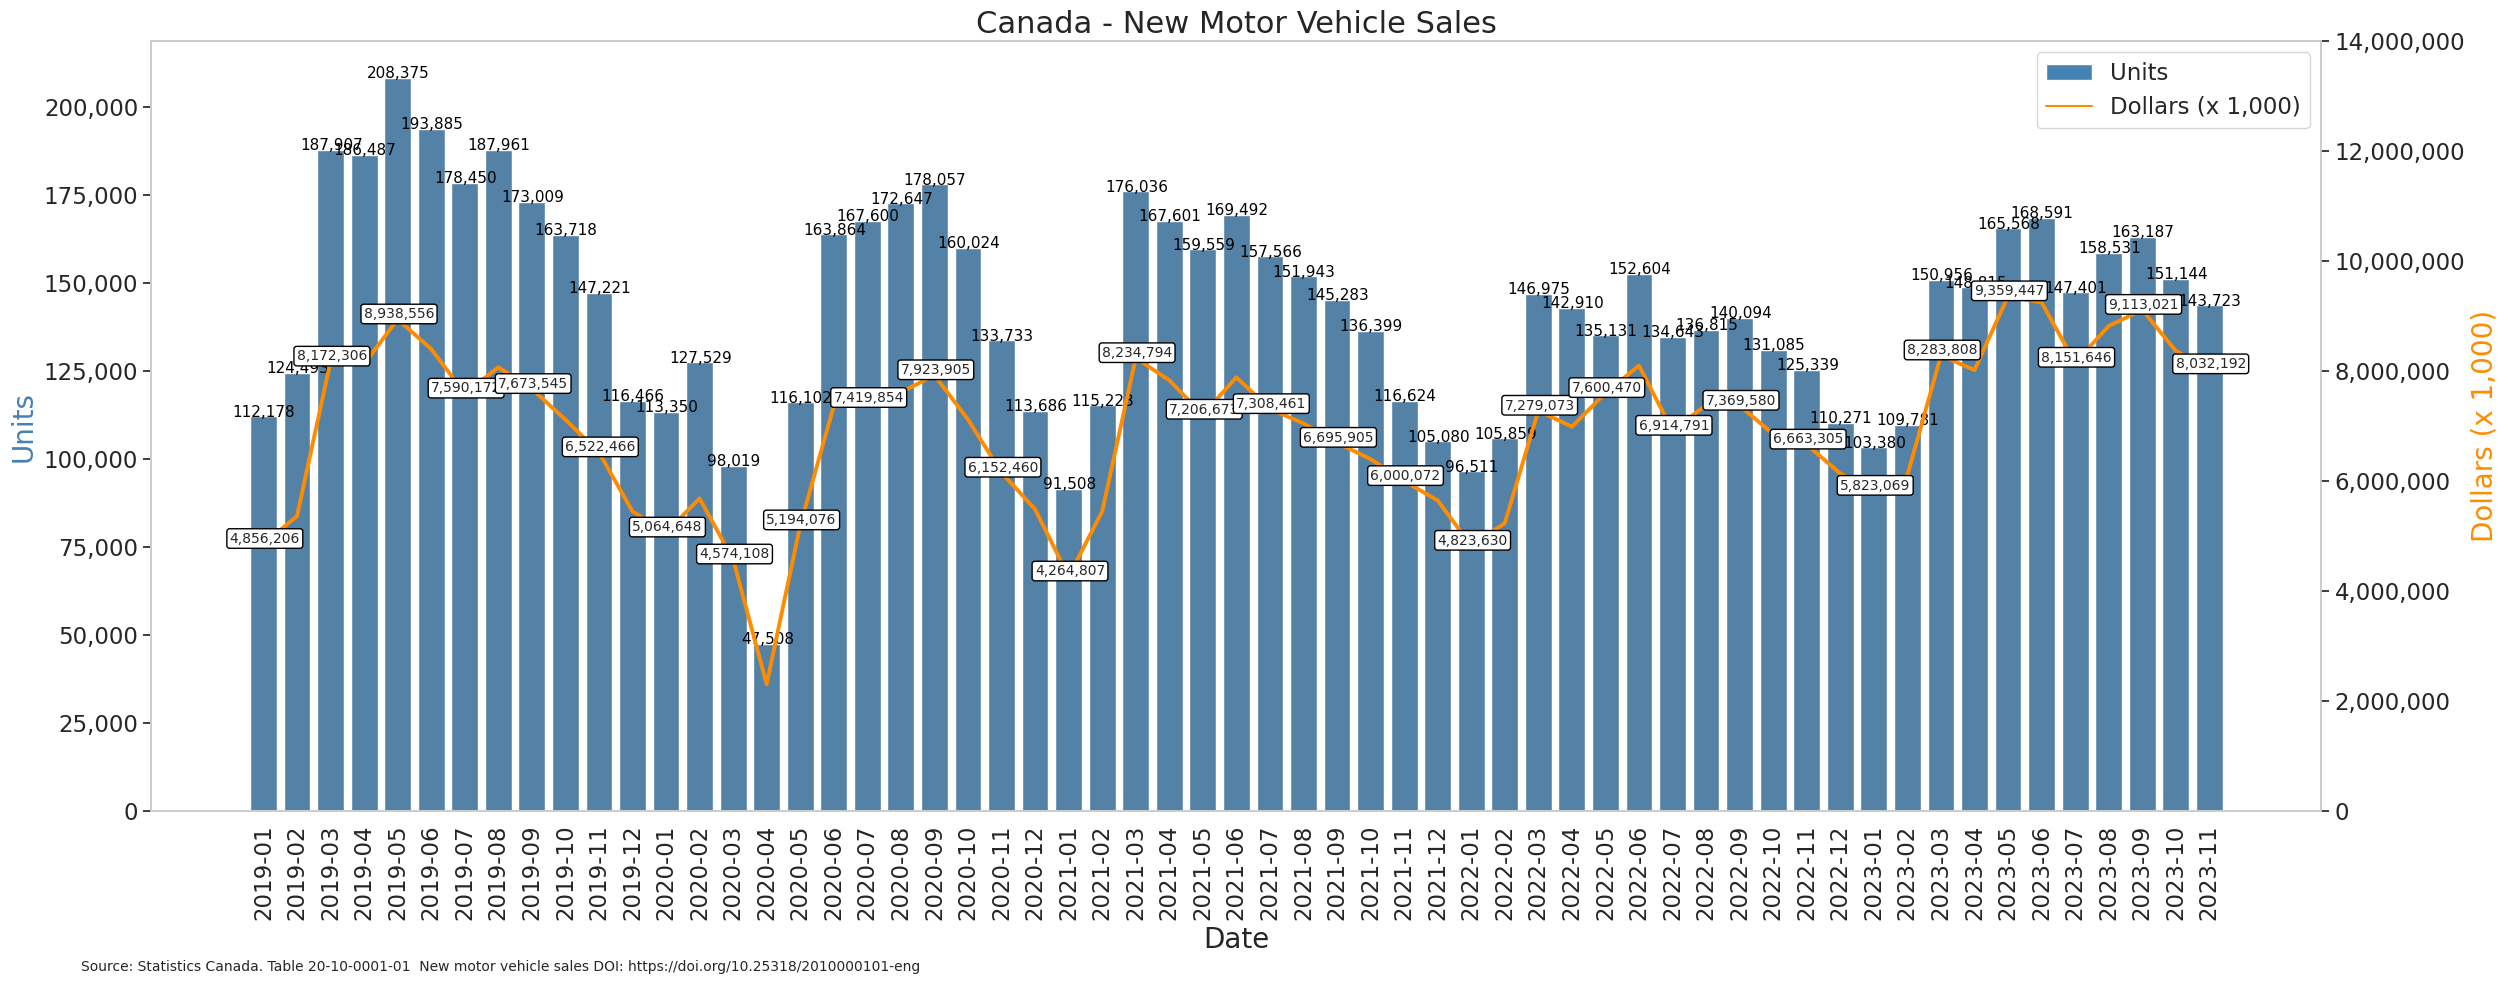

In [4]:
df = df[df['REF_DATE'] >= '2018-12']

# Axis 1
final_df = df[df['Sales'] == 'Units']
y1 = final_df.pivot(index='REF_DATE', columns='Sales', values='VALUE')

# Axis 2
final_df = df[df['Sales'] == 'Dollars']
y2 = final_df.pivot(index='REF_DATE', columns='Sales', values='VALUE')

x = y1.index.tolist()
y1 = y1['Units']
y2 = y2['Dollars']

sns.set(style="whitegrid", font_scale=1.5)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(28, 10),frameon =False)

# Plot the bar chart on the primary y-axis
bar = sns.barplot(x=x, y=y1, ax=ax1, color='steelblue')
ax1.set_ylabel('Units', color='steelblue', fontsize=20)

# Add values on top of the bars
for i, v in enumerate(y1):
    ax1.text(i + 0.02, v + 2, '{:,.0f}'.format(v), color='black', ha='center',fontsize=11)

plt.xticks(rotation=90) 
ax2 = ax1.twinx()

# Plot the line chart on the secondary y-axis
line = sns.lineplot(x=x, y=y2, ax=ax2, color='darkorange',linewidth=2.8,markers=True,markersize=11)
ax2.set_ylim([0, 14000000])
ax2.set_ylabel('Dollars (x 1,000)', color='darkorange', fontsize=20)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

skip_count = 1  # Specify how many labels to skip
skip_label = 0  # Initialize skip_label counter

# Add values on top of the bars
for i, v in enumerate(y2):
    if skip_label == 0:
        ax2.annotate(f'{v:,.0f}', xy=(i, v), xytext=(1, 1), ha='center', textcoords='offset points',bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='white'),fontsize=10) 
    
    skip_label = (skip_label + 1) % (skip_count + 1)    

# Set x-axis label and title
ax1.set_xlabel('Date', fontsize=20)
ax1.set_title('Canada - New Motor Vehicle Sales', fontsize=22)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Create legend with proxy artists
legend_labels = ['Units', 'Dollars (x 1,000)']
legend_elements = [Patch(facecolor='steelblue', label='Bar Plot'),
                   Line2D([0], [0], color='darkorange', label='Line Plot')]
plt.legend(handles=legend_elements, labels=legend_labels)

# Disable the background grid lines
ax1.grid(False)
ax2.grid(False)

# Adding a footnote below the x-axis
footnote_text = "Source: Statistics Canada. Table 20-10-0001-01  New motor vehicle sales DOI: https://doi.org/10.25318/2010000101-eng"
plt.figtext(0.1, -0.05, footnote_text, ha="left", fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))    

# Show the plot
plt.savefig("graph2.png",transparent=True,bbox_inches='tight',pad_inches=0.05,dpi=400) 
plt.show()